# GTZAN EDA and Feature Models

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing

import librosa
import librosa.display
import IPython.display as ipd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Set the path to import GTZAN data

In [ ]:
import os
general_path = '/Users/hannahgracesmith/Desktop/DS207_final_project/Data'

### Data Cleaning and Exploration

In [ ]:
# Available genres
genres = list(os.listdir(f'{general_path}/genres_original/'))
genres.remove('.DS_Store') # Shows up automatically so must remove after
print(genres)

['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


#### Features Data Frame

In [ ]:
# Import the available features for the 3 second clips
features_df = pd.read_csv("/Users/hannahgracesmith/Desktop/DS207_final_project/Data/features_3_sec.csv")

In [ ]:
# Overview
features_df.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
5,blues.00000.5.wav,66149,0.376670,0.089702,0.132618,0.003583,1994.915219,211700.619569,2152.767854,74263.873102,...,31.448069,-3.448373,34.284130,-0.416165,40.791092,-3.649625,32.457901,3.025218,28.892687,blues
6,blues.00000.6.wav,66149,0.379909,0.088827,0.130335,0.003166,1962.150096,177443.070045,2146.503479,98020.541422,...,33.954071,-2.068194,25.623655,1.428141,47.957699,-3.267124,39.382240,3.276939,25.999132,blues
7,blues.00000.7.wav,66149,0.331880,0.092119,0.140600,0.002546,1701.890924,35678.130616,1979.387612,36670.725886,...,38.456211,-3.637886,24.530296,-0.105148,26.716150,-2.016985,23.150423,0.210787,42.512966,blues
8,blues.00000.8.wav,66149,0.347877,0.094209,0.133130,0.002538,1746.473502,138073.931244,1887.619723,117069.920049,...,44.311455,-4.370029,29.873167,2.114592,33.843155,-2.264663,80.812393,3.758598,97.618835,blues
9,blues.00000.9.wav,66149,0.358061,0.082957,0.115312,0.001846,1763.948942,61493.423121,1874.195710,51944.921435,...,43.967834,-3.448304,48.671944,0.099792,41.839546,-7.677177,96.253654,0.791776,40.416420,blues


In [ ]:
# See distributions of available data
features_df.label.value_counts() # Data is distributed very evenly

blues        1000
jazz         1000
metal        1000
pop          1000
reggae       1000
disco         999
classical     998
hiphop        998
rock          998
country       997
Name: label, dtype: int64

### Visualizing the audio files using Librosa

Audio File: [-0.006073    0.0144043   0.04669189 ... -0.00701904 -0.01977539
 -0.02853394]


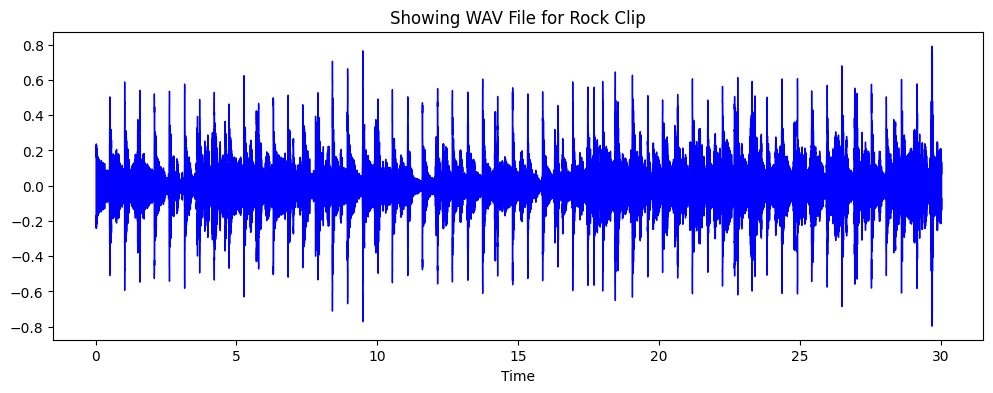

In [ ]:
# Explore visual of WAV file
audio = "/Users/hannahgracesmith/Desktop/DS207_final_project/Data/genres_original/rock/rock.00012.wav"

# Load the audio
data, sr = librosa.load(audio)

# Print the array
print('Audio File:', data)

# Plot
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Blue")
plt.title('Showing WAV File for Rock Clip')
plt.show()

### Some notes from ChatGPT about determining n_fft and hop_length: <br>
1. n_fft (FFT Window Size):
- Trade-off: A smaller n_fft provides better time resolution but lower frequency resolution, while a larger n_fft provides better frequency resolution but lower time resolution.
- Typical values: Common values for n_fft range from 256 to 2048, depending on the specific analysis. You might start with values like 512 or 1024 and adjust from there.
- Rule of thumb: Choose n_fft as a power of 2 for efficiency in FFT calculations. For example, 512 or 1024 is a good choice.

2. hop_length (Number of Frames between Columns):
- Trade-off: A smaller hop_length provides a more densely sampled spectrogram with better time resolution but potentially more columns (higher computational cost). A larger hop_length reduces time resolution but can be computationally more efficient.
- Typical values: Common values for hop_length often range from 128 to 512. You can start with a value like 256, but it can vary depending on your specific use case.
- Rule of thumb: A hop_length that's roughly half of n_fft is a common starting point. For example, if n_fft is 512, a hop_length of 256 might work well.

3. Experimentation and Analysis:
- The choice of n_fft and hop_length depends on the characteristics of your audio data, your specific analysis goals, and the trade-offs between time and frequency resolution.
- Experiment with different values to see how they impact your results. Visualize the resulting spectrogram and listen to the audio to evaluate the quality of the analysis.
- Consider whether you want to emphasize time-domain or frequency-domain features in your analysis. Smaller n_fft and hop_length values emphasize temporal changes, while larger values emphasize frequency detail.

In practice, it's often necessary to fine-tune these parameters based on the specific requirements of your project and the characteristics of your audio data. You can also use techniques like auto-tuning or feature extraction to help you choose the best parameters for your analysis.

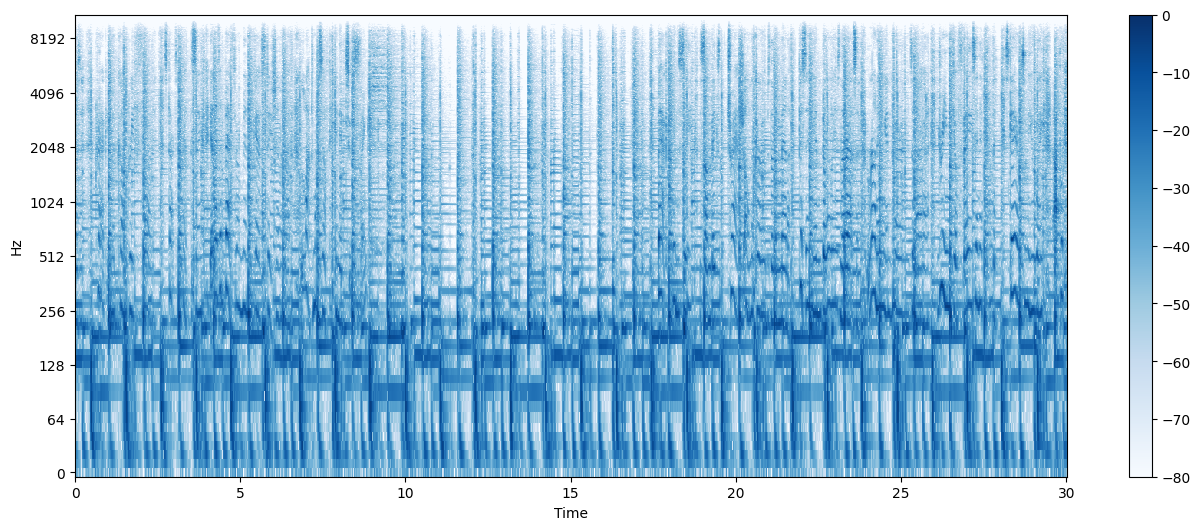

In [ ]:
# Explore the spectogram
# See above markdown for research on determining n_fft and hop_length
n_fft = 2048
hop_length = 512

# Short-time Fourier transform
stft_data = np.abs(librosa.stft(data, n_fft = n_fft, hop_length = hop_length))

# Convert an amplitude spectrogram to Decibels-scaled spectrogram
db_scaled_spectogram = librosa.amplitude_to_db(stft_data, ref = np.max)

# Plot
plt.figure(figsize = (16, 6))
librosa.display.specshow(db_scaled_spectogram, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'Blues')
plt.colorbar()

<Axes: title={'center': 'Correlation for All Feature Variables'}>

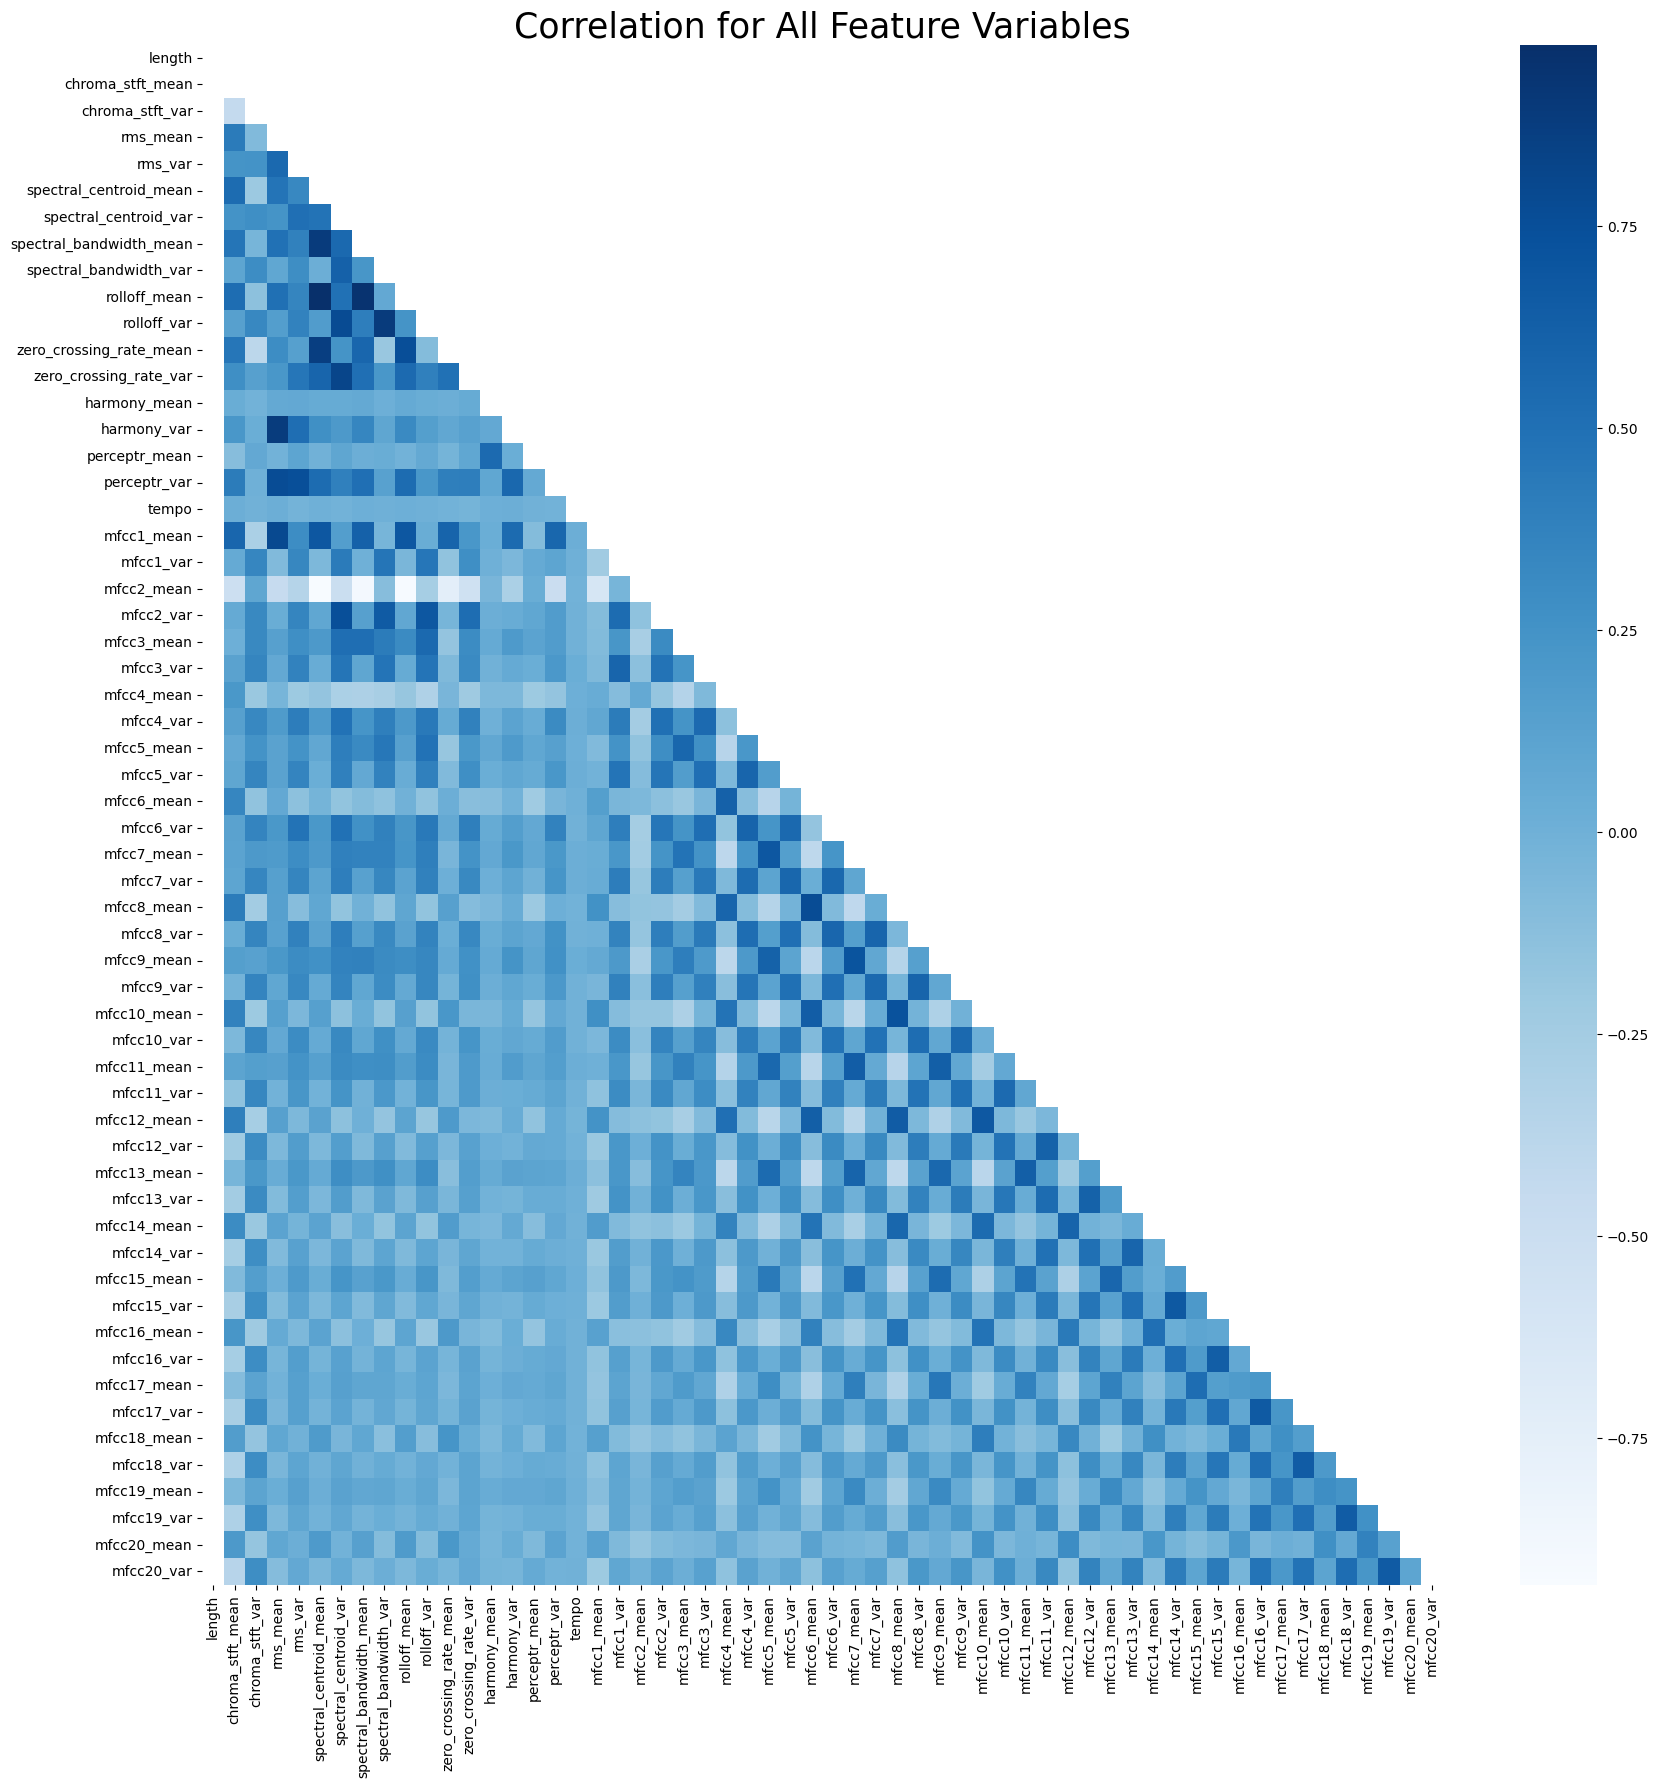

In [ ]:
# Looking at correlation
corr = features_df.corr()

# Plot
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 20))
plt.title('Correlation for All Feature Variables', fontsize = 25)
sns.heatmap(corr, mask=mask, cmap="Blues")

Text(0.5, 1.0, 'Correlation for Mean Variables')

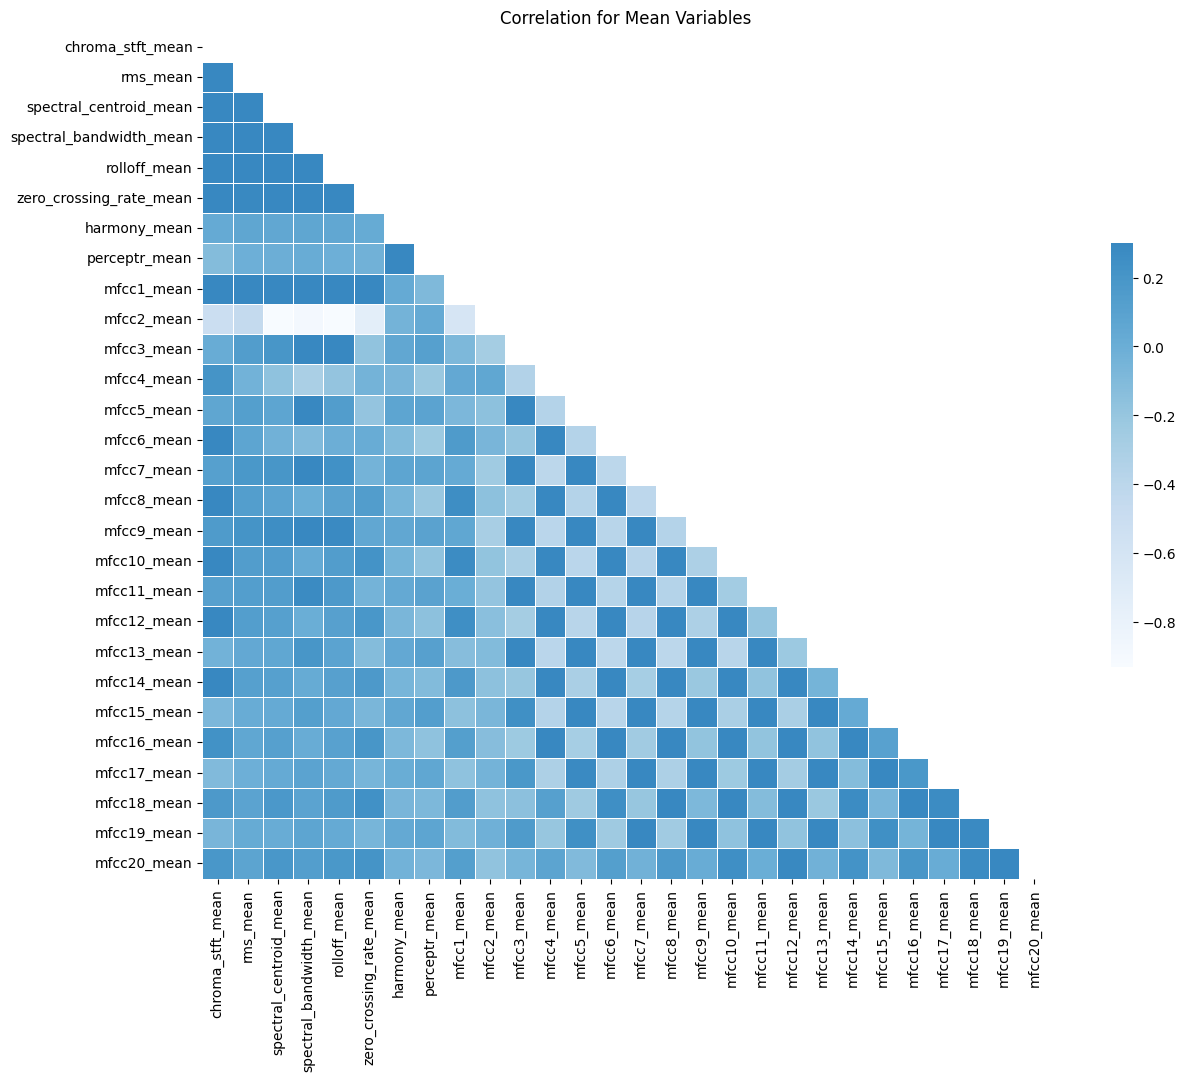

In [ ]:
# Correlation for mean features
spike_cols = [col for col in features_df.columns if 'mean' in col]
corr = features_df[spike_cols].corr()

# Mask
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Plot
f, ax = plt.subplots(figsize=(16, 11))
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation for Mean Variables')

Note that mfcc2_mean is highly negatively correlated with several other variables

## GTZAN Machine Learning Models

### Import libraries

In [2]:
# The rest of this notebook was done in Google Colab
from google.colab import drive
drive.mount('/content/drive')

features_df = pd.read_csv("/content/drive/MyDrive/features_30_sec.csv")


Mounted at /content/drive


In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

### Preprocessing

In [4]:
# Labels
data = features_df.iloc[0:, 1:] # We don't need the file names
y = data['label']
X = data.loc[:, data.columns != 'label']

#### Normalize

In [5]:
# Normalize
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### Split (80/20)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Evaluation

In [7]:
def calc_accuracy(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Accuracy
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Baselines

In [8]:
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
calc_accuracy(lg, "Logistic Regression")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
calc_accuracy(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
calc_accuracy(rforest, "Random Forest")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
calc_accuracy(nn, "Neural Nets")

Accuracy Logistic Regression : 0.61 

Accuracy KNN : 0.615 

Accuracy Random Forest : 0.765 

Accuracy Neural Nets : 0.69 



In [12]:
def plot_confusion_matrix(model):
    preds = model.predict(X_test)
    confusion = confusion_matrix(y_test, preds)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

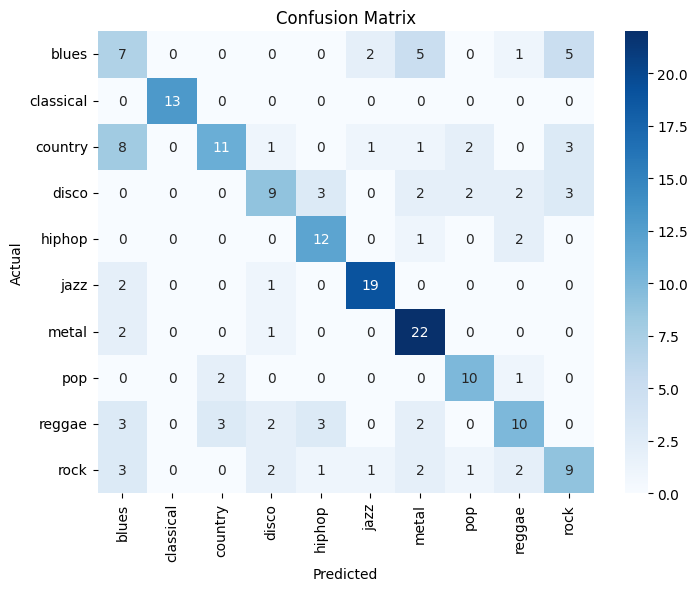

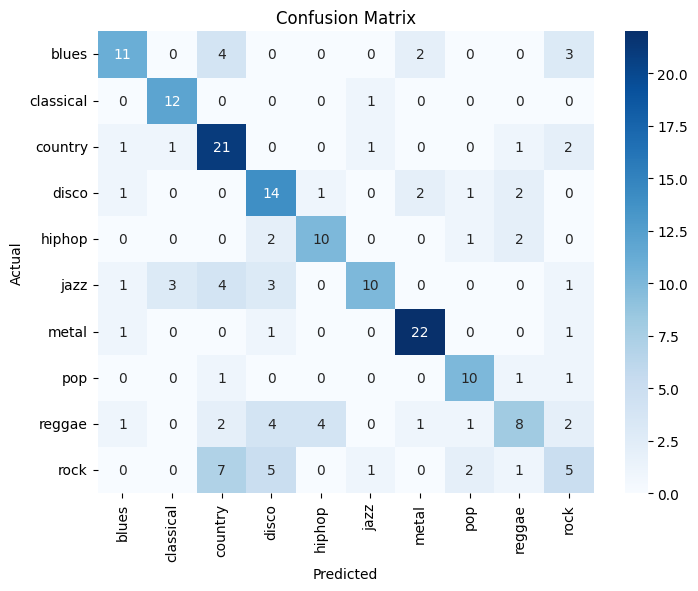

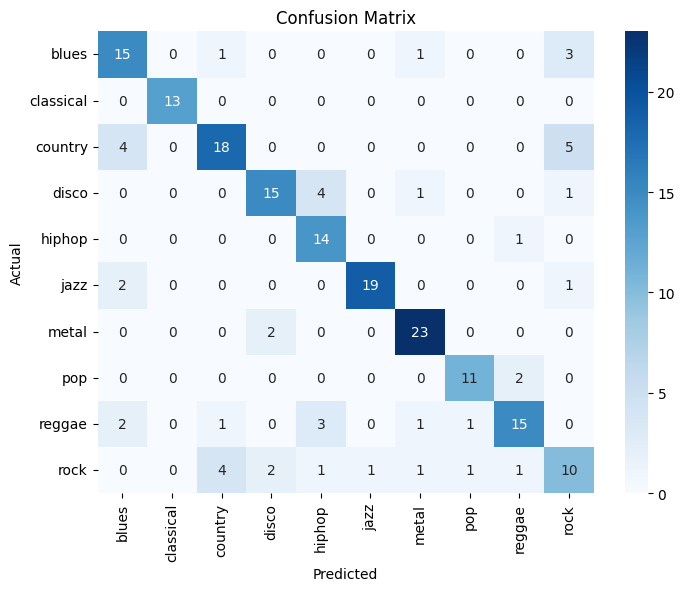

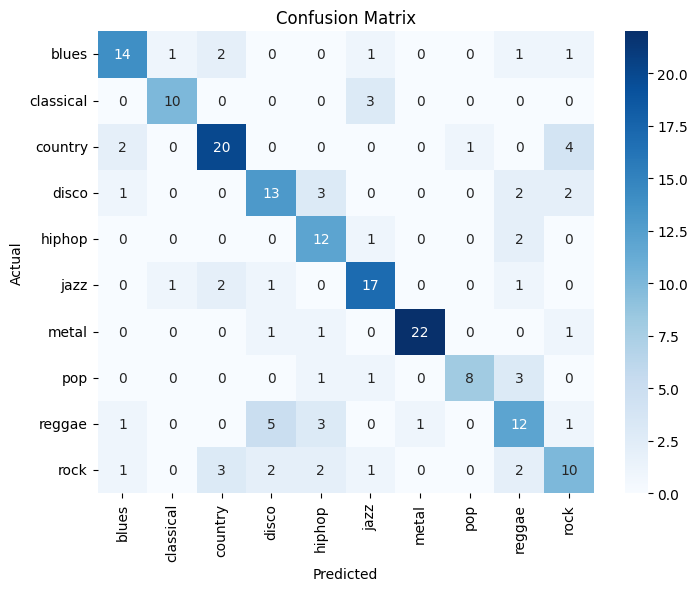

In [13]:
# Logistic Regression
plot_confusion_matrix(lg)

# KNN
plot_confusion_matrix(knn)

# Random Forest
plot_confusion_matrix(rforest)

# Neural Nets
plot_confusion_matrix(nn)

In [14]:
# Precision and Recall for Evaluation
def calculate_precision_recall(model, X, y, title='Default'):
    # Make predictions using the model
    y_pred = model.predict(X)

    # Calculate precision and recall
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')

    print(title)
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}\n')

# Look into 'macro', 'micro' and 'weighted' options

In [15]:
# Logistic Regression
calculate_precision_recall(lg, X_test, y_test, "Logistic Regression")

# KNN
calculate_precision_recall(knn, X_test, y_test, "KNN")

# Random Forest
calculate_precision_recall(rforest, X_test, y_test, "Random Forest")

# Neural Nets
calculate_precision_recall(nn, X_test, y_test, "Neural Nets")

Logistic Regression
Precision: 0.62885
Recall: 0.63622

KNN
Precision: 0.62428
Recall: 0.62739

Random Forest
Precision: 0.77655
Recall: 0.78224

Neural Nets
Precision: 0.70491
Recall: 0.68951



## Experiments Using KNN - GridSearchCV

Fine-tuning the hyperparameters to improve the accuracy.

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for KNN: {accuracy}")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Accuracy for KNN: 0.705


Using grid search, we were able to fine-tune our hyper-parameters to get an accuracy of 71%

### Try again with 3 sec clips

In [17]:
features_df = pd.read_csv("/content/drive/MyDrive/features_3_sec.csv")

### Preprocessing

In [18]:
# Labels
data = features_df.iloc[0:, 1:] # We don't need the file names
y = data['label']
X = data.loc[:, data.columns != 'label']

#### Normalize

In [19]:
# Normalize
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

#### Split (80/20)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Evaluation

In [21]:
def calc_accuracy(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Accuracy
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

### Baselines

In [22]:
# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
calc_accuracy(lg, "Logistic Regression")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
calc_accuracy(knn, "KNN")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
calc_accuracy(rforest, "Random Forest")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
calc_accuracy(nn, "Neural Nets")

Accuracy Logistic Regression : 0.7012 

Accuracy KNN : 0.83133 

Accuracy Random Forest : 0.81682 

Accuracy Neural Nets : 0.67918 



In [23]:
def plot_confusion_matrix(model):
    preds = model.predict(X_test)
    confusion = confusion_matrix(y_test, preds)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

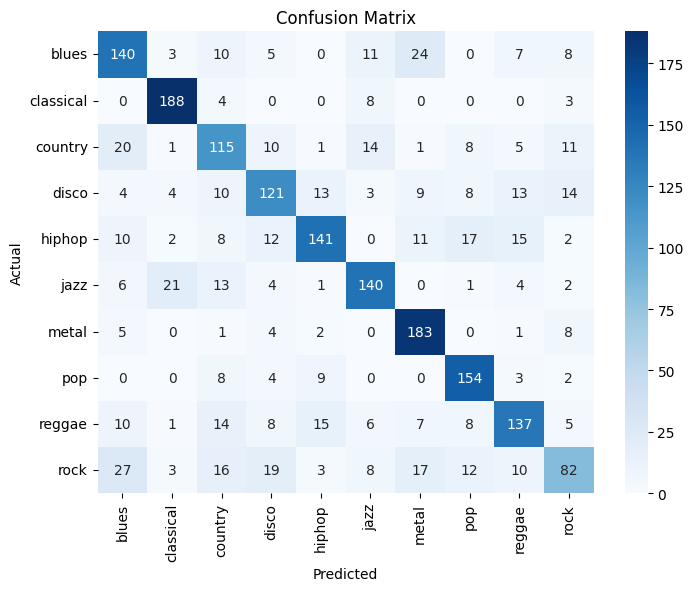

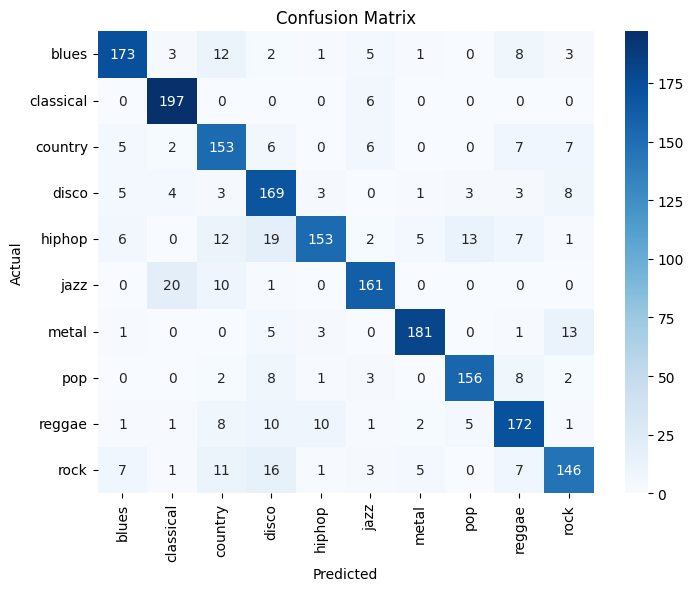

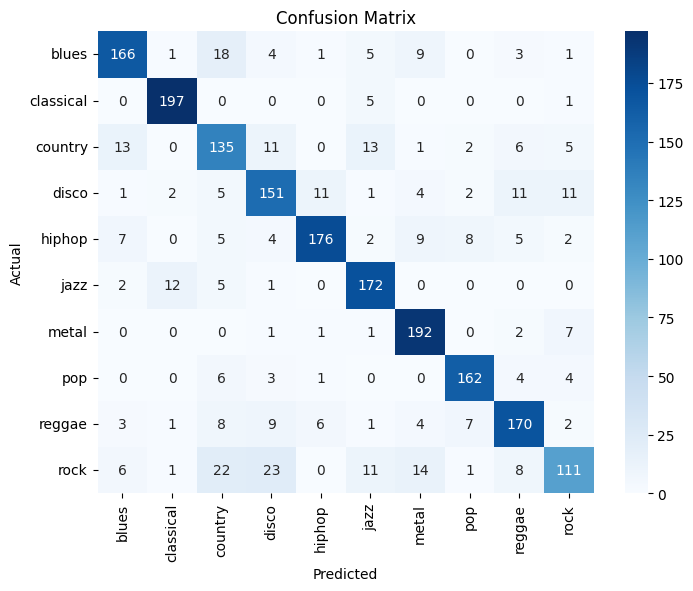

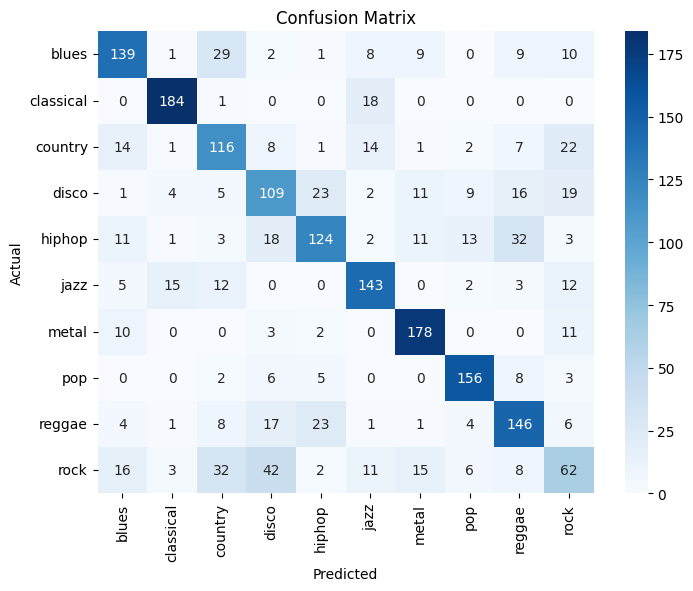

In [24]:
# Logistic Regression
plot_confusion_matrix(lg)

# KNN
plot_confusion_matrix(knn)

# Random Forest
plot_confusion_matrix(rforest)

# Neural Nets
plot_confusion_matrix(nn)

In [25]:
# Precision and Recall for Evaluation
def calculate_precision_recall(model, X, y, title='Default'):
    # Make predictions using the model
    y_pred = model.predict(X)

    # Calculate precision and recall
    precision = precision_score(y, y_pred, average='macro')
    recall = recall_score(y, y_pred, average='macro')

    print(title)
    print(f'Precision: {precision:.5f}')
    print(f'Recall: {recall:.5f}\n')

# Look into 'macro', 'micro' and 'weighted' options

In [26]:
# Logistic Regression
calculate_precision_recall(lg, X_test, y_test, "Logistic Regression")

# KNN
calculate_precision_recall(knn, X_test, y_test, "KNN")

# Random Forest
calculate_precision_recall(rforest, X_test, y_test, "Random Forest")

# Neural Nets
calculate_precision_recall(nn, X_test, y_test, "Neural Nets")

Logistic Regression
Precision: 0.69653
Recall: 0.70196

KNN
Precision: 0.83532
Recall: 0.83246

Random Forest
Precision: 0.81617
Recall: 0.81666

Neural Nets
Precision: 0.67209
Recall: 0.68055



## Experiments Using KNN - GridSearchCV

Fine-tuning the hyperparameters to improve the accuracy.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid to search over
param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for KNN: {accuracy}")

Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Accuracy for KNN: 0.938938938938939


Using grid search, we were able to fine-tune our hyper-parameters to get an accuracy of 94%